<a href="https://colab.research.google.com/github/hurshd0/DS-Unit-2-Regression-Classification/blob/master/module4/assignment_regression_classification_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 4

## Assignment

- [X] Watch Aaron Gallant's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes) to learn about the mathematics of Logistic Regression.
- [X] Do train/validate/test split with the Tanzania Waterpumps data.
- [X] Do one-hot encoding. (Remember it may not work with high cardinality categoricals.)
- [X] Use scikit-learn for logistic regression.
- [X] Get your validation accuracy score.
- [X] Get and plot your coefficients.
- [X] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [X] Commit your notebook to your fork of the GitHub repo.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.


## Stretch Goals

### Doing
- [X] Add your own stretch goal(s) !
- [X] Clean the data. For ideas, refer to [The Quartz guide to bad data](https://github.com/Quartz/bad-data-guide),  a "reference to problems seen in real-world data along with suggestions on how to resolve them." One of the issues is ["Zeros replace missing values."](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values)
- [X] Make exploratory visualizations.
- [X] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [X] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from the previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```

#### Pipelines

[Scikit-Learn User Guide](https://scikit-learn.org/stable/modules/compose.html) explains why pipelines are useful, and demonstrates how to use them:

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:
> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

### Reading
- [ ] [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)
- [ ] [Always start with a stupid model, no exceptions](https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa)
- [ ] [Statistical Modeling: The Two Cultures](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726)
- [ ] [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapters 1-3, for more math & theory, but in an accessible, readable way (without an excessive amount of formulas or academic pre-requisites).



In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Remove content files
    !rm -rf content
    !mkdir content
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/hurshd0/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module4')

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.0)
Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/hurshd0/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
################################ EDA IMPORTS ###################################
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go # interactive low-level plotting lib https://plot.ly/python/
import plotly.express as px #high-level api wrapper for plotly https://plot.ly/python/plotly-express/#visualize-distributions
# ---------------- Plot libs settings ------------- #
plt.style.use('seaborn-darkgrid')
sns.set(context='notebook', style='darkgrid', palette='colorblind')

# ---------------- Pandas settings --------------- #
# Removes rows and columns truncation of '...'
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
################################################################################

#################################### LOAD DATA #################################
train_features = pd.read_csv('../data/tanzania/train_features.csv')
train_labels = pd.read_csv('../data/tanzania/train_labels.csv')
test_features = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)
################################################################################

In [0]:
print(f'''
---------------- VALIDATE SHAPE ----------------
Train Features Shape: {train_features.shape}
Train Labels Shape: {train_labels.shape}
Test Features Shape: {test_features.shape}
Sample Submission Shape: {sample_submission.shape}
------------------------------------------------
''')


---------------- VALIDATE SHAPE ----------------
Train Features Shape: (59400, 40)
Train Labels Shape: (59400, 2)
Test Features Shape: (14358, 40)
Sample Submission Shape: (14358, 2)
------------------------------------------------



# QUICK PEEK AT DATA

In [0]:
train_features.head()

id  amount_tsh date_recorded        funder  gps_height     installer  longitude   latitude              wpt_name  num_private                    basin  subvillage   region  region_code  district_code        lga        ward  population public_meeting              recorded_by scheme_management                  scheme_name permit  construction_year extraction_type extraction_type_group extraction_type_class management management_group         payment payment_type water_quality quality_group      quantity quantity_group                source           source_type source_class              waterpoint_type waterpoint_type_group
0  69572      6000.0    2011-03-14         Roman        1390         Roman  34.938093  -9.856322                  none            0               Lake Nyasa    Mnyusi B   Iringa           11              5     Ludewa    Mundindi         109           True  GeoData Consultants Ltd               VWC                        Roman  False               1999         gravity               gravity               gravity        vwc       user-group    pay annually     annually          soft          good        enough         enough                spring                spring  groundwater           communal standpipe    communal standpipe
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI  34.698766  -2.147466              Zahanati            0            Lake Victoria     Nyamara     Mara           20              2  Serengeti       Natta         280            NaN  GeoData Consultants Ltd             Other                          NaN   True               2010         gravity               gravity               gravity        wug       user-group       never pay    never pay          soft          good  insufficient   insufficient  rainwater harvesting  rainwater harvesting      surface           communal standpipe    communal standpipe
2  34310        25.0    2013-02-25  Lottery Club         686  World vision  37.460664  -3.821329           Kwa Mahundi            0                  Pangani     Majengo  Manyara           21              4  Simanjiro     Ngorika         250           True  GeoData Consultants Ltd               VWC  Nyumba ya mungu pipe scheme   True               2009         gravity               gravity               gravity        vwc       user-group  pay per bucket   per bucket          soft          good        enough         enough                   dam                   dam      surface  communal standpipe multiple    communal standpipe
3  67743         0.0    2013-01-28        Unicef         263        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  Ruvuma / Southern Coast  Mahakamani   Mtwara           90             63   Nanyumbu    Nanyumbu          58           True  GeoData Consultants Ltd               VWC                          NaN   True               1986     submersible           submersible           submersible        vwc       user-group       never pay    never pay          soft          good           dry            dry           machine dbh              borehole  groundwater  communal standpipe multiple    communal standpipe
4  19728         0.0    2011-07-13   Action In A           0       Artisan  31.130847  -1.825359               Shuleni            0            Lake Victoria  Kyanyamisa   Kagera           18              1    Karagwe  Nyakasimbi           0           True  GeoData Consultants Ltd               NaN                          NaN   True                  0         gravity               gravity               gravity      other            other       never pay    never pay          soft          good      seasonal       seasonal  rainwater harvesting  rainwater harvesting      surface           communal standpipe    communal standpipe

In [0]:
test_features.head()

id  amount_tsh date_recorded                  funder  gps_height   installer  longitude   latitude                 wpt_name  num_private                    basin  subvillage   region  region_code  district_code            lga          ward  population public_meeting              recorded_by scheme_management     scheme_name permit  construction_year extraction_type extraction_type_group extraction_type_class   management management_group      payment payment_type water_quality quality_group      quantity quantity_group                source           source_type source_class     waterpoint_type waterpoint_type_group
0  50785         0.0    2013-02-04                    Dmdd        1996        DMDD  35.290799  -4.059696  Dinamu Secondary School            0                 Internal      Magoma  Manyara           21              3          Mbulu        Bashay         321           True  GeoData Consultants Ltd        Parastatal             NaN   True               2012           other                 other                 other   parastatal       parastatal    never pay    never pay          soft          good      seasonal       seasonal  rainwater harvesting  rainwater harvesting      surface               other                 other
1  51630         0.0    2013-02-04  Government Of Tanzania        1569         DWE  36.656709  -3.309214                  Kimnyak            0                  Pangani     Kimnyak   Arusha            2              2   Arusha Rural      Kimnyaki         300           True  GeoData Consultants Ltd               VWC  TPRI pipe line   True               2000         gravity               gravity               gravity          vwc       user-group    never pay    never pay          soft          good  insufficient   insufficient                spring                spring  groundwater  communal standpipe    communal standpipe
2  17168         0.0    2013-02-01                     NaN        1567         NaN  34.767863  -5.004344           Puma Secondary            0                 Internal       Msatu  Singida           13              2  Singida Rural          Puma         500           True  GeoData Consultants Ltd               VWC               P    NaN               2010           other                 other                 other          vwc       user-group    never pay    never pay          soft          good  insufficient   insufficient  rainwater harvesting  rainwater harvesting      surface               other                 other
3  45559         0.0    2013-01-22              Finn Water         267  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0  Ruvuma / Southern Coast  Kipindimbi    Lindi           80             43         Liwale       Mkutano         250            NaN  GeoData Consultants Ltd               VWC             NaN   True               1987           other                 other                 other          vwc       user-group      unknown      unknown          soft          good           dry            dry          shallow well          shallow well  groundwater               other                 other
4  49871       500.0    2013-03-27                  Bruder        1260      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0  Ruvuma / Southern Coast     Losonga   Ruvuma           10              3         Mbinga  Mbinga Urban          60            NaN  GeoData Consultants Ltd       Water Board          BRUDER   True               2000         gravity               gravity               gravity  water board       user-group  pay monthly      monthly          soft          good        enough         enough                spring                spring  groundwater  communal standpipe    communal standpipe

In [0]:
train_labels.head()

id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

In [0]:
sample_submission.head()

id status_group
0  50785   functional
1  51630   functional
2  17168   functional
3  45559   functional
4  49871   functional

### MERGE FEATURES + LABELS FOR EDA

In [0]:
merged_df = pd.merge(train_features, train_labels, how='inner', on='id', validate='1:1')
merged_df.head()

id  amount_tsh date_recorded        funder  gps_height     installer  longitude   latitude              wpt_name  num_private                    basin  subvillage   region  region_code  district_code        lga        ward  population public_meeting              recorded_by scheme_management                  scheme_name permit  construction_year extraction_type extraction_type_group extraction_type_class management management_group         payment payment_type water_quality quality_group      quantity quantity_group                source           source_type source_class              waterpoint_type waterpoint_type_group    status_group
0  69572      6000.0    2011-03-14         Roman        1390         Roman  34.938093  -9.856322                  none            0               Lake Nyasa    Mnyusi B   Iringa           11              5     Ludewa    Mundindi         109           True  GeoData Consultants Ltd               VWC                        Roman  False               1999         gravity               gravity               gravity        vwc       user-group    pay annually     annually          soft          good        enough         enough                spring                spring  groundwater           communal standpipe    communal standpipe      functional
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI  34.698766  -2.147466              Zahanati            0            Lake Victoria     Nyamara     Mara           20              2  Serengeti       Natta         280            NaN  GeoData Consultants Ltd             Other                          NaN   True               2010         gravity               gravity               gravity        wug       user-group       never pay    never pay          soft          good  insufficient   insufficient  rainwater harvesting  rainwater harvesting      surface           communal standpipe    communal standpipe      functional
2  34310        25.0    2013-02-25  Lottery Club         686  World vision  37.460664  -3.821329           Kwa Mahundi            0                  Pangani     Majengo  Manyara           21              4  Simanjiro     Ngorika         250           True  GeoData Consultants Ltd               VWC  Nyumba ya mungu pipe scheme   True               2009         gravity               gravity               gravity        vwc       user-group  pay per bucket   per bucket          soft          good        enough         enough                   dam                   dam      surface  communal standpipe multiple    communal standpipe      functional
3  67743         0.0    2013-01-28        Unicef         263        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  Ruvuma / Southern Coast  Mahakamani   Mtwara           90             63   Nanyumbu    Nanyumbu          58           True  GeoData Consultants Ltd               VWC                          NaN   True               1986     submersible           submersible           submersible        vwc       user-group       never pay    never pay          soft          good           dry            dry           machine dbh              borehole  groundwater  communal standpipe multiple    communal standpipe  non functional
4  19728         0.0    2011-07-13   Action In A           0       Artisan  31.130847  -1.825359               Shuleni            0            Lake Victoria  Kyanyamisa   Kagera           18              1    Karagwe  Nyakasimbi           0           True  GeoData Consultants Ltd               NaN                          NaN   True                  0         gravity               gravity               gravity      other            other       never pay    never pay          soft          good      seasonal       seasonal  rainwater harvesting  rainwater harvesting      surface           communal standpipe    communal standpipe      functional

# PANDAS PROFILING

In [0]:
# Run it once
merged_df.profile_report()

# TRAIN MODEL

In [0]:
#################################### ML IMPORTS ################################

### Pre-Processing
import category_encoders as ce
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest

### Score Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

### Pipeline
from sklearn.pipeline import make_pipeline

### Classifiers
from sklearn.linear_model import LogisticRegression
################################################################################

## TRAIN-VAL-SPLIT

In [0]:
from sklearn.model_selection import train_test_split

X_train = train_features
y_train = train_labels['status_group']

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, train_size=0.80, test_size=0.20, 
    stratify=y_train, random_state=42
) 

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 40), (11880, 40), (47520,), (11880,))

## LOGISTIC REGRESSION

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes=None,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    from sklearn.utils.multiclass import unique_labels
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    labels_is_string = False
    uniq_labels = unique_labels(y_true, y_pred)
    for val in uniq_labels:
        if isinstance(val, str):
            labels_is_string = True
            break
    if labels_is_string:
        classes = uniq_labels
    else:
        classes = classes[unique_labels(y_true, y_pred)]
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def accuracy_recall(y_true, y_pred):
    print('Accuracy Score: ', accuracy_score(y_true, y_pred))
    print('Recall: ', recall_score(y_true, y_pred))
    print('F1 Score: ', f1_score(y_true, y_pred))

def get_metrics(model, X_train, X_val, y_train, y_val):
    # Train accuracy
    y_true = y_train
    y_pred = model.predict(X_train)
    print('-------- TRAINING SET --------')
    accuracy_recall(y_true, y_pred)

    # Validation Accuracy
    y_true = y_val
    y_pred = model.predict(X_val)
    print('-------- VALIDATION SET --------')
    accuracy_recall(y_true, y_pred)

### BASELINE MODELS

#### Majority Class

In [0]:
(y_train.value_counts(normalize=True) * 100).round(2)

functional                 54.31
non functional             38.42
functional needs repair     7.27
Name: status_group, dtype: float64

#### Numerical features

#### @ Drop non-numeric features

In [0]:
X_train_numeric = X_train.select_dtypes('number')
X_val_numeric = X_val.select_dtypes('number')

#### @ Drop nulls if necessary

In [0]:
# Check for nulls in numeric
X_train_numeric.isnull().sum()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

#### @ Fit Logistic Regression

In [0]:
# 1. Instantiate and fit the model
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000, n_jobs=-1)
model.fit(X_train_numeric, y_train)

# 2. Get score
y_pred = model.predict(X_val_numeric)
acc = accuracy_score(y_val, y_pred)
print(f"Accuracy Score for just numerical features: {acc:.2f}")

Accuracy Score for just numerical features: 0.55


#### @ What predictions does a Logistic Regresion Return ?

Normalized confusion matrix
[[0.93459392 0.         0.06540608]
 [0.86790267 0.         0.13209733]
 [0.88061336 0.         0.11938664]]


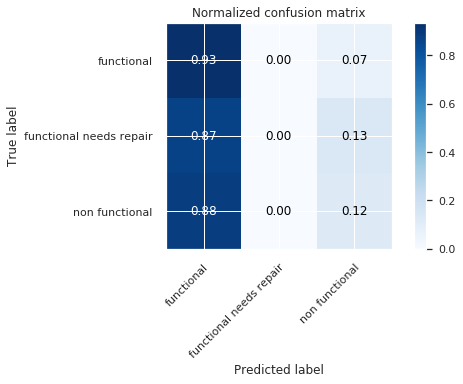

In [0]:
plot_confusion_matrix(y_val, y_pred, normalize=True);

### SIMPLE FAST BASELINE MODEL 

In [0]:
X_train.describe(exclude='number').T.sort_values(by='unique')

count unique                      top   freq
recorded_by            47520      1  GeoData Consultants Ltd  47520
public_meeting         44876      2                     True  40838
permit                 45077      2                     True  31071
source_class           47520      3              groundwater  36638
management_group       47520      5               user-group  42027
quantity_group         47520      5                   enough  26567
quantity               47520      5                   enough  26567
waterpoint_type_group  47520      6       communal standpipe  27642
quality_group          47520      6                     good  40598
payment_type           47520      7                never pay  20287
source_type            47520      7                   spring  13620
waterpoint_type        47520      7       communal standpipe  22778
extraction_type_class  47520      7                  gravity  21448
payment                47520      7                never pay  20287
water_quality          47520      8                     soft  40598
basin                  47520      9            Lake Victoria   8137
source                 47520     10                   spring  13620
scheme_management      44392     12                      VWC  29470
management             47520     12                      vwc  32449
extraction_type_group  47520     13                  gravity  21448
extraction_type        47520     18                  gravity  21448
region                 47520     21                   Iringa   4250
lga                    47520    124                   Njombe   2003
date_recorded          47520    349               2011-03-17    474
funder                 44616   1716   Government Of Tanzania   7321
installer              44603   1929                      DWE  13978
ward                   47520   2082                    Igosi    257
scheme_name            24988   2563                        K    548
subvillage             47234  17231                  Shuleni    420
wpt_name               47520  30661                     none   2879

In [0]:
[col for col, val in zip(X_train.select_dtypes(exclude='number').nunique().index, X_train.select_dtypes(exclude='number').nunique().values) if (val > 2 and val < 12)]

['basin',
 'extraction_type_class',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [0]:
# 1. Select low-cardinalit features

useless_columns = ['recorded_by', 'quantity_group', 'extraction_type_group', 'num_private']
bool_columns = ['public_meeting', 'permit']
high_cardinality = ['date_recorded', 'funder', 'installer', 'lga', 'scheme_name', 'subvillage', 'ward', 'wpt_name']
features = X_train.columns.drop(high_cardinality, axis=1)

# 2. One-Hot encoding of categorical features


TypeError: ignored

# SUPERFAST EDA

## SINGLE VARIABLE ANALYSIS

## PAIRWISE ANALYSIS

### `LATITUDE`, `LONGITUDE` and `STATUS_GROUP`

In [0]:
merged_df.head()

id  amount_tsh date_recorded        funder  gps_height     installer  longitude   latitude              wpt_name  num_private                    basin  subvillage   region  region_code  district_code        lga        ward  population public_meeting              recorded_by scheme_management                  scheme_name permit  construction_year extraction_type extraction_type_group extraction_type_class management management_group         payment payment_type water_quality quality_group      quantity quantity_group                source           source_type source_class              waterpoint_type waterpoint_type_group    status_group
0  69572      6000.0    2011-03-14         Roman        1390         Roman  34.938093  -9.856322                  none            0               Lake Nyasa    Mnyusi B   Iringa           11              5     Ludewa    Mundindi         109           True  GeoData Consultants Ltd               VWC                        Roman  False               1999         gravity               gravity               gravity        vwc       user-group    pay annually     annually          soft          good        enough         enough                spring                spring  groundwater           communal standpipe    communal standpipe      functional
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI  34.698766  -2.147466              Zahanati            0            Lake Victoria     Nyamara     Mara           20              2  Serengeti       Natta         280            NaN  GeoData Consultants Ltd             Other                          NaN   True               2010         gravity               gravity               gravity        wug       user-group       never pay    never pay          soft          good  insufficient   insufficient  rainwater harvesting  rainwater harvesting      surface           communal standpipe    communal standpipe      functional
2  34310        25.0    2013-02-25  Lottery Club         686  World vision  37.460664  -3.821329           Kwa Mahundi            0                  Pangani     Majengo  Manyara           21              4  Simanjiro     Ngorika         250           True  GeoData Consultants Ltd               VWC  Nyumba ya mungu pipe scheme   True               2009         gravity               gravity               gravity        vwc       user-group  pay per bucket   per bucket          soft          good        enough         enough                   dam                   dam      surface  communal standpipe multiple    communal standpipe      functional
3  67743         0.0    2013-01-28        Unicef         263        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  Ruvuma / Southern Coast  Mahakamani   Mtwara           90             63   Nanyumbu    Nanyumbu          58           True  GeoData Consultants Ltd               VWC                          NaN   True               1986     submersible           submersible           submersible        vwc       user-group       never pay    never pay          soft          good           dry            dry           machine dbh              borehole  groundwater  communal standpipe multiple    communal standpipe  non functional
4  19728         0.0    2011-07-13   Action In A           0       Artisan  31.130847  -1.825359               Shuleni            0            Lake Victoria  Kyanyamisa   Kagera           18              1    Karagwe  Nyakasimbi           0           True  GeoData Consultants Ltd               NaN                          NaN   True                  0         gravity               gravity               gravity      other            other       never pay    never pay          soft          good      seasonal       seasonal  rainwater harvesting  rainwater harvesting      surface           communal standpipe    communal standpipe      functional

In [0]:
px.set_mapbox_access_token(open(".mapbox_token.txt").read())
px.scatter_mapbox(merged_df, lat="latitude", lon="longitude", color="status_group",
                  size_max=15, zoom=10)

# AGAIN TRAIN MODEL

## LOGISTIC REGRESSION

### COMPLEX MODELS